Intercept: 998933.6973363687
Coefficients: [ 1.20270838e+02  7.97631338e-01  3.45957728e+03 -2.30730546e+03
 -1.56232986e+03  2.57816667e+01 -6.18575459e+01  5.92613165e+00
  9.00181495e+00 -3.56543936e+02  4.79659751e+01 -1.15085010e+03
 -1.33729066e+03 -1.22140607e+03 -7.38121569e+02 -7.14239516e+02
 -6.15883426e+02  1.13119276e+00  8.60875326e-02 -3.17737025e-01
 -2.30731536e-03 -8.52597284e-04 -6.35134525e-04 -3.56732855e-01
 -1.95803673e-01  1.59527581e+00  2.24337674e-02  8.03479270e-03
 -1.07213705e-02  3.34483803e+02 -1.76969335e+02  9.73264610e+00
 -2.64082717e+02 -9.68481847e+01  3.35771992e+02 -1.42123304e+02
  1.93658405e+02 -9.98857077e+05 -9.99871418e+05 -1.00045945e+06
 -9.99345893e+05 -9.99431161e+05  2.77918284e+03  1.54680851e+03
 -1.44959972e+04  6.60041852e+03  2.14672394e+03  2.09690676e+03
 -1.53612305e+03 -1.88811198e+03  2.19945187e+02 -1.30330208e+03
  4.55729251e+02 -6.95974855e+02 -1.06168037e+02  1.37191035e+02
  7.95551182e+02  7.12557202e+02]
Error of trai

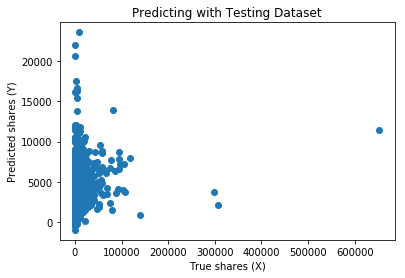

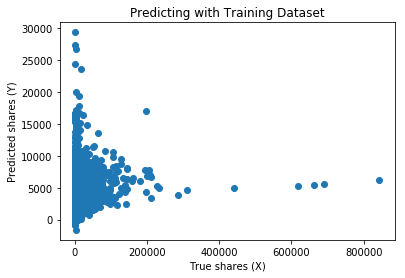

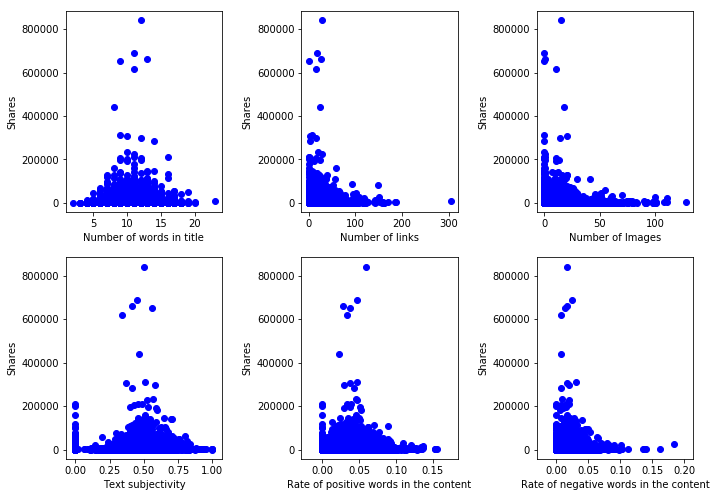

In [2]:
################################################ Import libraries ############################################################
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

####################### Loading dataset and splitting into test and training datasets #########################################
# using new dataset online popularity news
# Load data from .csv file
dataset = pd.read_csv('OnlineNewsPopularity.csv') 
data = dataset[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' is_weekend',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',' abs_title_sentiment_polarity']]
target = dataset[' shares']  

# Split the data into two parts: training data and testing data 
# Here testing dataset size=20% and training dataset=80%
train_data,test_data,train_target,test_target = train_test_split(data,target, test_size=0.2, random_state=42)  

############################### Task 1-1: use linear regression in sklearn #####################################################
regressor = LinearRegression() #creating linear regression object
model=regressor.fit(train_data, train_target) # building model using training dataset 

############################## Task 1-2: show intercept and coefficents ########################################################
# using attribute 'intercept' and 'coef_' of linearRegression module of sklearn
# View the intercept
print('Intercept:',model.intercept_)
# View the feature coefficients
print('Coefficients:', model.coef_)

predicted = model.predict(test_data)
predicted_train = model.predict(train_data)

############################## Task 1-3: show errors on training dataset and testing dataset ###################################
# using mean squared error formula given in class to show errors on testing and training dataset 
# (Summation of [(ti - yi)^2])/2N, N=number of features
# using numpy.mean function to get the mean and dividing by 2
print('Error of train data:',np.mean((predicted_train - train_target) **2)/2)  
print('Error of test data:',np.mean((predicted - test_target) **2)/2)  
print('Model Score on Testing Dataset: ', model.score(test_data, test_target)) # accuracy of the model on testing dataset
print('Model Score on Training Dataset: ', model.score(train_data, train_target))# accuracy of the model on training dataset

################ Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset ##################
#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(test_target, predicted) #Plotting true and predicted values of shares 
plt.axis('tight')
plt.xlabel('True shares (X)')
plt.ylabel('Predicted shares (Y)')
plt.title('Predicting with Testing Dataset')

#plotting predicted price values with price values of training dataset
plt.figure()
plt.scatter(train_target, predicted_train)
plt.axis('tight')
plt.xlabel('True shares (X)')
plt.ylabel('Predicted shares (Y)')
plt.title('Predicting with Training Dataset')

#graphs of relationships between fetaures with number of shares  
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.scatter(data[[' n_tokens_title']],target,c='b')
plt.xlabel('Number of words in title')
plt.ylabel('Shares')

plt.subplot(3,3,2)
plt.scatter(data[[' num_hrefs']],target,c='b')
plt.xlabel('Number of links')
plt.ylabel('Shares')

plt.subplot(3,3,3)
plt.scatter(data[[' num_imgs']],target,c='b')
plt.xlabel('Number of Images')
plt.ylabel('Shares')

plt.subplot(3,3,4)
plt.scatter(data[[' global_subjectivity']],target,c='b')
plt.xlabel('Text subjectivity')
plt.ylabel('Shares')

plt.subplot(3,3,5)
plt.scatter(data[[' global_rate_positive_words']],target,c='b')
plt.xlabel('Rate of positive words in the content')
plt.ylabel('Shares')

plt.subplot(3,3,6)
plt.scatter(data[[' global_rate_negative_words']],target,c='b')
plt.xlabel('Rate of negative words in the content')
plt.ylabel('Shares')

plt.tight_layout() # to get clear spacing between subplots